## Heart Disease Prediction
We will evaluate several machine learning models and compare their performance, ultimately selecting the best one to develop a predictive system.

In [175]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

Data Collection and Preprocessing

In [176]:
# Loading the data
heart_data = pd.read_csv('/content/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [177]:
heart_data.shape

(1025, 14)

In [178]:
# Getting info on the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [179]:
#Confirming that there are no missing values
print(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [180]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Given the differences in the numerical ranges of the columns, scaling the data will be a good idea.



In [181]:
heart_data['target'].value_counts()

,count
target,
1,526
0,499


This is a binary classification task, where 0 represents no heart disease and 1 indicates the presence of heart disease.

In [221]:
X = heart_data.drop(columns = 'target')
Y = heart_data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

Scaling the Data

In [222]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#1. Logistic Regression

In [223]:
#First time trying to fit, logistic regression model needed more than 100 iterations since data wasn't scaled.
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [224]:
X_train_prediction = lr.predict(X_train)
lr_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training Data:", lr_train_accuracy)

Accuracy on Training Data: 0.8463414634146341


In [225]:
X_test_prediction = lr.predict(X_test)
lr_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on Test Data:", lr_test_accuracy)

Accuracy on Test Data: 0.8439024390243902


In [226]:
# Further analysis of Test results
print("Confusion Matrix")
print(confusion_matrix(Y_test, X_test_prediction))
print("\n")
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

Confusion Matrix
[[ 72  22]
 [ 10 101]]


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        94
           1       0.82      0.91      0.86       111

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



#2. Decision Tree

In [227]:
dtc = DecisionTreeClassifier(max_depth = 6)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6)

In [228]:
X_train_prediction = dtc.predict(X_train)
dtc_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training Data:", dtc_train_accuracy)

Accuracy on Training Data: 0.9621951219512195


In [229]:
X_test_prediction = dtc.predict(X_test)
dtc_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on Test Data:", dtc_test_accuracy)

Accuracy on Test Data: 0.9463414634146341


In [230]:
# Further analysis of Test results
print("Confusion Matrix")
print(confusion_matrix(Y_test, X_test_prediction))
print("\n")
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

Confusion Matrix
[[ 88   6]
 [  5 106]]


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        94
           1       0.95      0.95      0.95       111

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



#3. Support Vector Machine

In [231]:
# Finding the best Kernel
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  SVM = SVC(kernel = kernel)
  SVM.fit(X_train, Y_train)
  y_hat_train = SVM.predict(X_train)
  print(f'Kernel: {kernel}, Train Accuracy: {accuracy_score(Y_train, y_hat_train)}')
  y_hat = SVM.predict(X_test)
  print(f'Kernel: {kernel}, Test Accuracy: {accuracy_score(Y_test, y_hat)}')
  print('\n')

Kernel: linear, Train Accuracy: 0.8621951219512195
Kernel: linear, Test Accuracy: 0.8536585365853658


Kernel: poly, Train Accuracy: 0.947560975609756
Kernel: poly, Test Accuracy: 0.9317073170731708


Kernel: rbf, Train Accuracy: 0.9451219512195121
Kernel: rbf, Test Accuracy: 0.8926829268292683


Kernel: sigmoid, Train Accuracy: 0.748780487804878
Kernel: sigmoid, Test Accuracy: 0.7951219512195122




Poly is a good kernel choice.

In [232]:
SVM = SVC(kernel = 'poly')
SVM.fit(X_train, Y_train)

SVC(kernel='poly')

In [233]:
X_train_prediction = SVM.predict(X_train)
svm_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training Data:", svm_train_accuracy)

Accuracy on Training Data: 0.947560975609756


In [234]:
X_test_prediction = SVM.predict(X_test)
svm_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on Test Data:", svm_test_accuracy)

Accuracy on Test Data: 0.9317073170731708


In [235]:
# Further analysis of Test results
print("Confusion Matrix")
print(confusion_matrix(Y_test, X_test_prediction))
print("\n")
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

Confusion Matrix
[[ 82  12]
 [  2 109]]


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        94
           1       0.90      0.98      0.94       111

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.94      0.93      0.93       205



#4. Random Forest Classifier

In [236]:
rfc = RandomForestClassifier(max_depth = 6)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6)

In [237]:
X_train_prediction = rfc.predict(X_train)
rfc_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training Data:", rfc_train_accuracy)

Accuracy on Training Data: 0.9829268292682927


In [238]:
X_test_prediction = rfc.predict(X_test)
rfc_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on Test Data:", rfc_test_accuracy)

Accuracy on Test Data: 0.9658536585365853


In [239]:
# Further analysis of Test results
print("Confusion Matrix")
print(confusion_matrix(Y_test, X_test_prediction))
print("\n")
print("Classification Report")
print(classification_report(Y_test, X_test_prediction))

Confusion Matrix
[[ 88   6]
 [  1 110]]


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        94
           1       0.95      0.99      0.97       111

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



Comparing Accuracy Scores

In [240]:
Final_Metrics = {
    'Logistic Regression': [lr_train_accuracy, lr_test_accuracy],
    'Decision Tree': [dtc_train_accuracy, dtc_test_accuracy],
    'Support Vector Machine': [svm_train_accuracy, svm_test_accuracy],
    'Random Forest Classifier': [rfc_train_accuracy, rfc_test_accuracy]
}
Final_Metrics = pd.DataFrame(Final_Metrics, index = ['Training Accuracy', 'Test Accuracy'])
Final_Metrics

,Logistic Regression,Decision Tree,Support Vector Machine,Random Forest Classifier
Training Accuracy,0.846341,0.962195,0.947561,0.982927
Test Accuracy,0.843902,0.946341,0.931707,0.965854


<Figure size 1000x600 with 0 Axes>

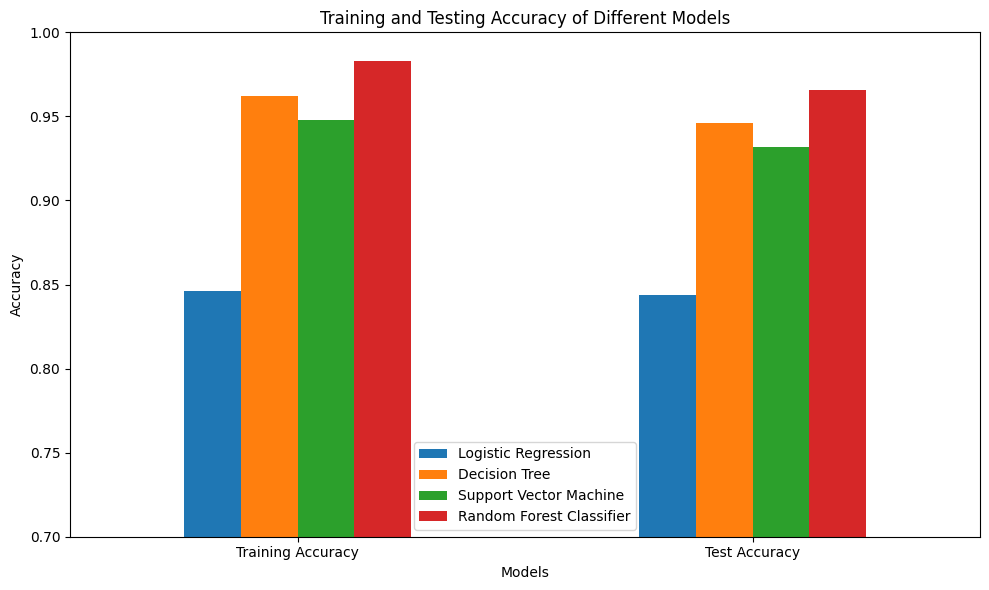

In [297]:
plt.figure(figsize = (10, 6))
Final_Metrics.plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Training and Testing Accuracy of Different Models')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.ylabel('Accuracy')
plt.ylim(.7, 1.0)
plt.tight_layout()

# Show the plot
plt.show()

Given the data, although all the models performed well, the Random Forest Classifier achieved the best results on both the training and testing datasets and will be the model used to build the predictive system.

# Building a Predictive System

In [312]:
def predict_heart_disease(input_data):
  # Ensures input data has 13 features
  if type(input_data) != list and type(input_data) != tuple:
    raise ValueError("Input data must be a list or tuple.")
  if len(input_data) != 13:
    raise ValueError("Input data must have 13 features.")

  feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca', 'thal']
  # Converts the input data to a numpy array
  input_data_np = np.asarray(input_data)
  # Reshapes the input data to match the model's input shape (1 row, 13 columns)
  input_data_np = input_data_np.reshape(1, -1)
  input_data_df = pd.DataFrame(input_data_np, columns = feature_names)
  input_data_df = scaler.transform(input_data_df)
  prediction = rfc.predict(input_data_df)
  if prediction[0] == 0:
    return "This person most likely does not have a heart disease."
  else:
    return "This person most likely has a heart disease."

In [313]:
# Example usages using observations from the dataset

# Expected Result: No Heart Disease
print(predict_heart_disease((43, 0, 0, 132, 341, 1, 0, 136, 1, 3, 1, 0, 3)))

# Expected Result: Heart Disease
print(predict_heart_disease([34, 0, 1, 118, 210, 0, 1, 192, 0, .7, 2, 0, 2]))

This person most likely does not have a heart disease.
This person most likely has a heart disease.
